#### Reading data
Using pandas library. Notice the csv read and the join.

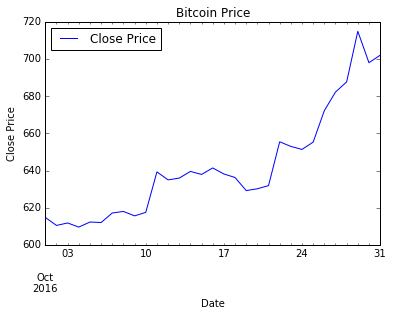

,Close Price
2016-10-27,682.223962
2016-10-28,687.688337
2016-10-29,714.895450
2016-10-30,698.003400
2016-10-31,702.001512


In [21]:
import pandas
import matplotlib.pyplot as plt

% matplotlib inline
file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file, 
                     header=None, 
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts

ax = selected_df[['Close Price']].plot(figsize=(6, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Bitcoin Price')
plt.show()

# print("head")
# df.head()
selected_df.tail()

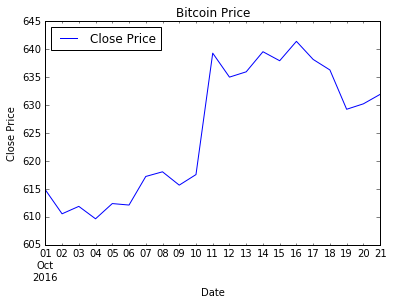

In [65]:
ax = selected_df.ix[0:21, ['Close Price']].plot(figsize=(6, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Bitcoin Price')
plt.show()

#### Rolling mean
There is a hypotesis that the rolling average is the true underlying price of a stock. If the price cross the rolling average (mean) that is a *BAD* signal.

#### Bollinger bands or Rolling standard deviation
2 standard deviations up/below the mean. When the price goes way below or up the rolling stddev that could be a signal to buy/sell.

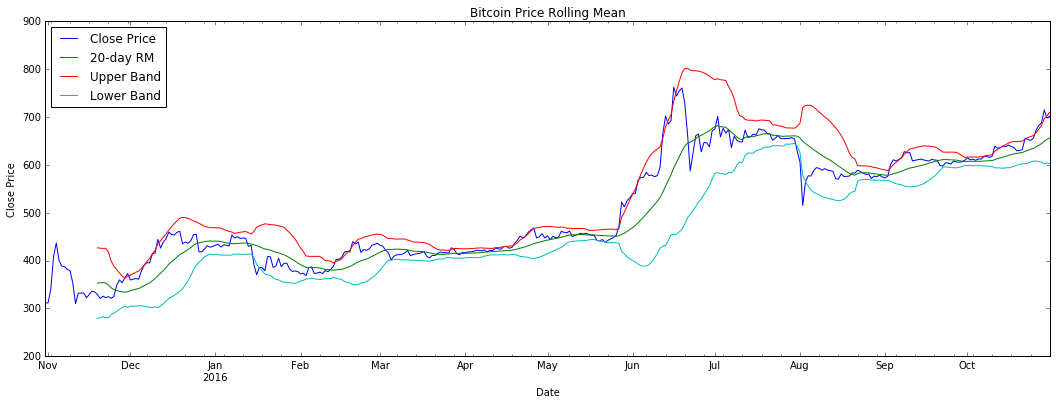

In [71]:
def plot_bollinger_bands(df, title, xlabel, ylabel, window=20, figsize=(18, 6), legendloc='upper left'):
    ax = df.plot(title=title, label=ylabel, figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # rolling mean
    rm = df.rolling(center=False, window=window).mean()
    rm.plot(label=str(window)+'-day RM', ax=ax)

    # rolling stddev
    rs = df.rolling(center=False, window=window).std()
    upband = rm + 2 * rs
    upband.plot(label='Upper Band', ax=ax)
    loband = rm - 2 * rs
    loband.plot(label='Lower Band', ax=ax)

    ax.legend(loc=legendloc)
    plt.show()

dates = pandas.date_range('2015/10/31', '2016/10/31')  # todo this is not a year
year_df = pandas.DataFrame(index=dates)
year_df = year_df.join(df)  # how='inner' inverts

plot_bollinger_bands(year_df['Close Price'], title='Bitcoin Price Rolling Mean', xlabel='Date', ylabel='Close Price', figsize=(18, 6))

# plot bands 
# ax = year_df['Close Price'].plot(title='Bitcoin Price Rolling Mean', label='Close Price', figsize=(18, 6))
# ax.set_xlabel('Date')
# ax.set_ylabel('Close Price')
#
# # rolling mean
# rm = year_df['Close Price'].rolling(center=False, window=20).mean()
# rm.plot(label='20-day RM', ax=ax)
#
# # rolling stddev
# rs = year_df['Close Price'].rolling(center=False, window=20).std()
# upband = rm + 2 * rs
# upband.plot(label='Upper Band', ax=ax)
# loband = rm - 2 * rs
# loband.plot(label='Lower Band', ax=ax)
#
# ax.legend(loc='upper left')
# plt.show()

#### Daily returns
The __most__ important statistics in financial analysis to denote how much the price goes up or down in a particular day.

daily_return[t] = (price[t]/price[t-1])-1

Daily returns help us to see trends in data, i.e. when one goes up the other goes down

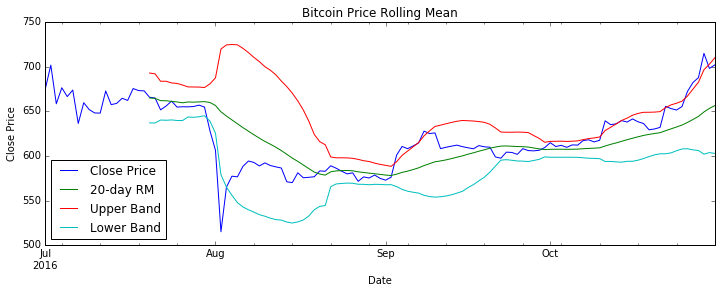

In [72]:
dates = pandas.date_range('2016/07/01', '2016/10/31')  # todo this is not a year
month_df = pandas.DataFrame(index=dates)
month_df = month_df.join(df)  # how='inner' inverts

plot_bollinger_bands(month_df['Close Price'], title='Bitcoin Price Rolling Mean', xlabel='Date', ylabel='Close Price', figsize=(12, 4), legendloc='lower left')

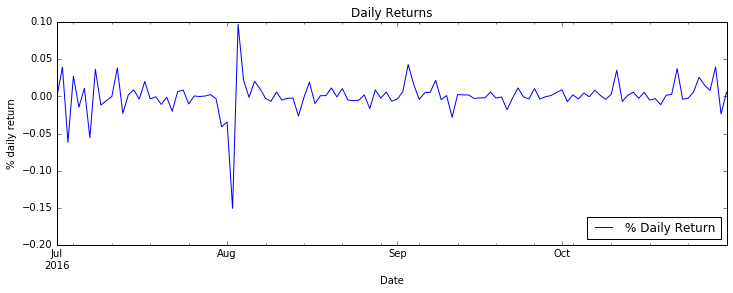

In [97]:
def calc_daily_returns(df):
    dfcopy = df.copy()
    dfcopy.ix[0] = 0
    dfcopy[1:] = df[1:] / df.values[:-1] - 1
    return dfcopy

dr = calc_daily_returns(month_df)
dr.rename(columns={'Close Price': '% Daily Return'}, inplace=True)
ax = dr.plot(figsize=(12, 4))
ax.set_xlabel('Date')
ax.set_ylabel('% daily return')
ax.set_title('Daily Returns')
ax.legend(loc='lower right')  # ,labels=['% daily return'])  # set the labels 
plt.show()

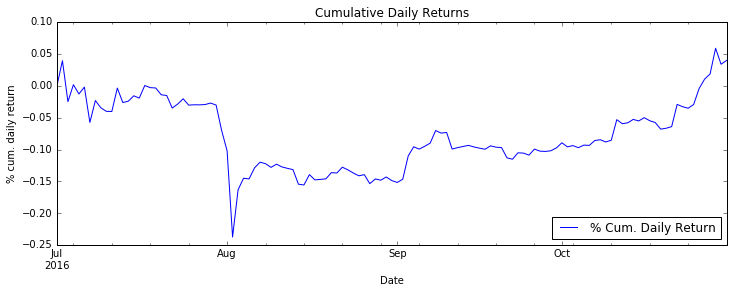

In [98]:
def calc_cumulative_daily_return(df):
    dfcopy = df.copy()
    dfcopy.ix[0] = 0
    dfcopy[1:] = df[1:]/df.values[0] - 1
    return dfcopy


cdr = calc_cumulative_daily_return(month_df)
cdr.rename(columns={'Close Price': '% Cum. Daily Return'}, inplace=True)
ax = cdr.plot(figsize=(12, 4))
ax.set_xlabel('Date')
ax.set_ylabel('% cum. daily return')
ax.set_title('Cumulative Daily Returns')
ax.legend(loc='lower right')  # , labels=['% cum. daily return'])
plt.show()

### Histograms for Daily Returns
Contains the number of occurrences and the value (daily return). Useful for comparing stocks. A histogram is composed by bins. Compare RETURN and VOLATILITY. The histogram of daily return values typically looks like a Gaussian or normal distribution.

We plot the mean, the stddev or on average how far do individual measurements deviate from the mean, and the kurtosis.

The kurtosis could be "curved" or "arching", is the probability in the tails of the distribution. How much different is a histogram from the traditional Gauss distribution?
 . + positive kurtosis: more ocurrences in tails
 . - negative kurtosis: fewer ocurrences in tails

Is very important! NOT ALL distribution are normal! Some said this was the great mistake for 2008. The mortage banks assumed the mortages were normally distributed:
- first, they assume the return of each of these mortages was independent
- second, the return was normally distributed

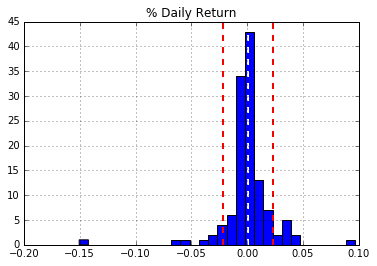

mean % Daily Return    0.00058
dtype: float64
stddev % Daily Return    0.022668
dtype: float64
kurtosis % Daily Return    18.325128
dtype: float64



In [106]:
dr.hist(bins=30)
mean = dr.mean()
stddev = dr.std()
plt.axvline(mean[0], color='w', linestyle='--', linewidth='2')
plt.axvline(mean[0] - stddev[0], color='r', linestyle='--', linewidth='2')
plt.axvline(mean[0] + stddev[0], color='r', linestyle='--', linewidth='2')
plt.show()
print("mean", mean)
print("stddev", stddev)
print("kurtosis", dr.kurtosis())
print()

In [ ]:
# comparing two stocks
# import numpy as np
# beta, alpha = np.polyfit(dr['SPY'], dr['IBM'], 1) 
# dr.plot(kind='scatter', x='SPY', y='IBM')
# plt.plot(dr['SPY'], beta_ibm*dr['SPY'] + alpha_ibm, '-', color='r') # y = mx + b  =>  y = beta*x + alpha
# plt.show()